## Secssion 1: Twitter API 

In [1]:
import tweepy as tw
import pandas as pd
import csv
import ssl
# your Twitter API key and API secret
my_api_key = "d83LOq2Cbe2vdc2qNSIrAk0eT"
my_api_secret = "3meeaIpYOk6d7qRq3MLjncUDeARzUSmXB8S8Yb9PogfU4mkTit"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [2]:
# Collect tweets
#test
for tweets in api.search_tweets(q="#nuclearwar ", lang="en",since_id=1498141004179910662,count=5):
    print(tweets.text)

RT @valdaitweets: 📆 On March 10, at 5:00 pm, the Valdai Club will host an expert discussion dedicated to the 52nd anniversary of the Treaty…
This Z thing the #Russians are #branding all over everything

I have a #feeling it has a meaning that is more… https://t.co/MgR5LCXEyP
RT @gbc2021: #GBC was listed on @coinsniper_net 🔥🚀 
Please vote here to be officially listed👇 
https://t.co/eBvnztbSK4
(every 24h you can v…
RT @gbc2021: #GBC was listed on @coinsniper_net 🔥🚀 
Please vote here to be officially listed👇 
https://t.co/eBvnztbSK4
(every 24h you can v…
Ukraine No-Fly Zone ‘Could Lead to End of Human Civilization’ @ForeignPoli_C #Canadians #Ukraine #VolodymyrZelensky… https://t.co/GD1hJbfAxy


In [20]:
tweetsSearch= api.search_tweets(q="#nuclearwar", lang="en",count=10000)
#making tweets as a list
list= [[tweets.text] for tweets in tweetsSearch]
#making the list to pandas dataframe
df_nuc =pd.DataFrame(list,columns = ['nuclearwar'])  
df_nuc.head()

nuclearwar
0  RT @_KucingKecil_: Bloom and Doom\nFirst #Vict...
1  RT @_KucingKecil_: Bloom and Doom\nFirst #Vict...
2  If you don't know what the Budapest Memorandum...
3  RT @gbc2021: #GBC was listed on @coinsniper_ne...
4  RT @BuyPullbacks: Three top U.S. diplomats hav...

In [4]:
df_nuc.shape

(100, 1)

In [151]:
tweetsSearch= api.search_tweets(q="#nike", lang="en",count=10000)
#making tweets as a list
list= [[tweets.text] for tweets in tweetsSearch]
#making the list to pandas dataframe
df_nike =pd.DataFrame(list,columns = ['nike']) 

In [152]:
print(df_nike.shape)
df_nike.head()

(100, 1)


nike
0  RT @bodega: Nike x Sacai Vaporwaffle Black Gum...
1  RT @CeroromoBragg: #NBATwitterLive FOLLOW PART...
2  RT @CeroromoBragg: #NBATwitterLive FOLLOW PART...
3  RT @camellin1969: So good I had to share! Chec...
4  RT @CeroromoBragg: #NBATwitterLive FOLLOW PART...

In [149]:
tweetsSearch= api.search_tweets(q="#gasprices", lang="en",count=10000)
#making tweets as a list
list= [[tweets.text] for tweets in tweetsSearch]
#making the list to pandas dataframe
df_gas=pd.DataFrame(list,columns = ['gasprices']) 

In [150]:
df_gas.shape

(100, 1)

## Secssion 2: Tweets analysis

In [24]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
# Importing the dataset
#DATASET_COLUMNS=['target','ids','date','flag','user','text']
#DATASET_ENCODING = "ISO-8859-1"
#dataset = pd.read_csv('data_X.csv')#, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
#dataset.sample(5)

In [10]:
#dataset.head()

In [14]:
#dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Columns: 498 entries, -0.099362 to Unnamed: 497
dtypes: float64(498)
memory usage: 128.5 KB


## Data Preprocessing 

In [18]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [21]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda text: cleaning_stopwords(text))
df_nike['nike'] = df_nike['nike'].apply(lambda text: cleaning_stopwords(text))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_stopwords(text))

df_nuc['nuclearwar'].head()

0    RT @_KucingKecil_: Bloom Doom First #VictimofC...
1    RT @_KucingKecil_: Bloom Doom First #VictimofC...
2    If don't know Budapest Memorandum is, time kno...
3    RT @gbc2021: #GBC listed @coinsniper_net 🔥🚀 Pl...
4    RT @BuyPullbacks: Three top U.S. diplomats qui...
Name: nuclearwar, dtype: object

In [22]:
# Cleaning and removing punctuations 
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_nuc['nuclearwar']= df_nuc['nuclearwar'].apply(lambda x: cleaning_punctuations(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_punctuations(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_punctuations(text))
df_nuc['nuclearwar'].tail()


95    RT gbc2021 GBC listed coinsnipernet 🔥🚀 Please ...
96    RT KucingKecil Bloom Doom First VictimofCivili...
97    RT JohninBrussels Presence US nuclear weapons ...
98    RT KucingKecil Bloom Doom First VictimofCivili...
99    Bloom Doom First VictimofCivilization collecti...
Name: nuclearwar, dtype: object

In [25]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda x: cleaning_repeating_char(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_repeating_char(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_repeating_char(text))

df_nuc['nuclearwar'].tail()

95    RT gbc201 GBC listed coinsnipernet 🔥🚀 Please v...
96    RT KucingKecil Bloom Doom First VictimofCivili...
97    RT JohninBrussels Presence US nuclear weapons ...
98    RT KucingKecil Bloom Doom First VictimofCivili...
99    Bloom Doom First VictimofCivilization collecti...
Name: nuclearwar, dtype: object

In [190]:
# Cleaning and removing URL’s 
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda x: cleaning_URLs(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_URLs(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_URLs(text))
print(df_nike['nike'][89])

So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset…  


In [27]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda x: cleaning_numbers(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_numbers(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_numbers(text))
df_nuc['nuclearwar'].tail()

95    RT gbc GBC listed coinsnipernet 🔥🚀 Please vote...
96    RT KucingKecil Bloom Doom First VictimofCivili...
97    RT JohninBrussels Presence US nuclear weapons ...
98    RT KucingKecil Bloom Doom First VictimofCivili...
99    Bloom Doom First VictimofCivilization collecti...
Name: nuclearwar, dtype: object

In [131]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(data):
    
    data_neg = []
    data_pos = []
    data_neu = []
    
    for sentence in data: 
        
        # Create a SentimentIntensityAnalyzer object.
        sid_obj = SentimentIntensityAnalyzer()

        # polarity_scores method of SentimentIntensityAnalyzer
        # object gives a sentiment dictionary.
        # which contains pos, neg, neu, and compound scores.
        sentiment_dict = sid_obj.polarity_scores(sentence)

        # decide sentiment as positive, negative and neutral
        if sentiment_dict['compound'] >= 0.05 :
            data_pos.append(sentence)

        elif sentiment_dict['compound'] <= - 0.05 :
            data_neg.append(sentence)
        else :
            data_neu.append(sentence)
    
    
    return data_neg, data_pos, data_neu

In [156]:
# confirming the status of each tweet

data_neg_nuc, data_pos_nuc, data_neu_nuc = sentiment_scores(df_nuc['nuclearwar'])
data_neg_nike, data_pos_nike, data_neu_nike = sentiment_scores(df_nike['nike'])
data_neg_gas, data_pos_gas, data_neu_gas = sentiment_scores(df_gas['gasprices'])
n_neg = len(data_neg_nuc)
n_pos = len(data_pos_nuc)
n_neu = len(data_neu_nuc)
print('nuclearwar')
print(' Number of Positive tweeets: {}\n Number of Negative tweeets: {}\n Number of Neutral tweeets: {}\n'.format(n_pos, n_neg, n_neu))

n_neg_nike = len(data_neg_nike)
n_pos_nike = len(data_pos_nike)
n_neu_nike = len(data_neu_nike)
print('Nike')
print(' Number of Positive tweeets: {}\n Number of Negative tweeets: {}\n Number of Neutral tweeets: {}\n'.format(n_pos_nike, n_neg_nike, n_neu_nike))

n_neg_gas = len(data_neg_gas)
n_pos_gas = len(data_pos_gas)
n_neu_gas = len(data_neu_gas)
print('gasprices')
print(' Number of Positive tweeets: {}\n Number of Negative tweeets: {}\n Number of Neutral tweeets: {}\n'.format(n_pos_gas, n_neg_gas, n_neu_gas))


nuclearwar
 Number of Positive tweeets: 28
 Number of Negative tweeets: 39
 Number of Neutral tweeets: 33

Nike
 Number of Positive tweeets: 66
 Number of Negative tweeets: 7
 Number of Neutral tweeets: 27

gasprices
 Number of Positive tweeets: 23
 Number of Negative tweeets: 43
 Number of Neutral tweeets: 34



<Figure size 720x720 with 0 Axes>

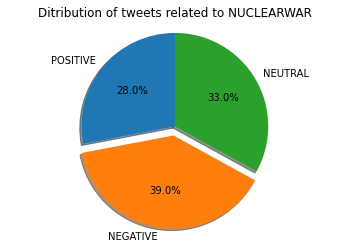

In [168]:
# Pie chart of positive negative and neutral tweets of Nuclearwar:
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [n_pos, n_neg, n_neu]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Negtative')

plt.figure(figsize = (10,10))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ditribution of tweets related to NUCLEARWAR')

plt.savefig('piechart_nuclearwar.png')
plt.show()


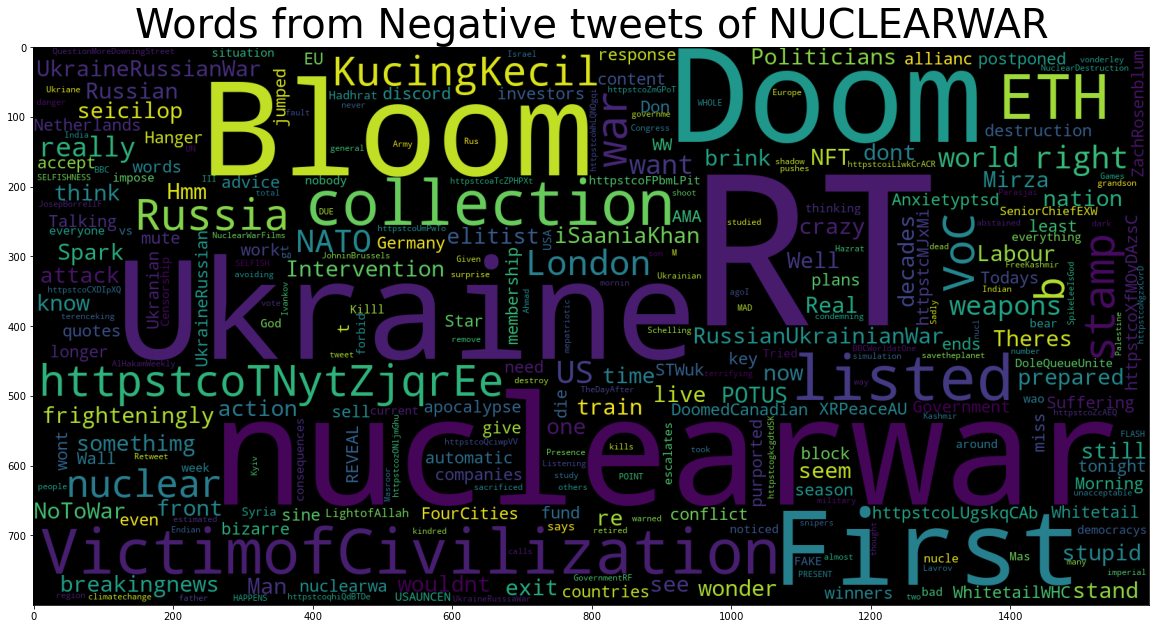

In [170]:
# Plot a cloud of words for negative tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neg_nuc))
plt.title('Words from Negative tweets of NUCLEARWAR',fontsize = 40)
plt.imshow(wc)

plt.savefig('neg_nuclearwar.png')


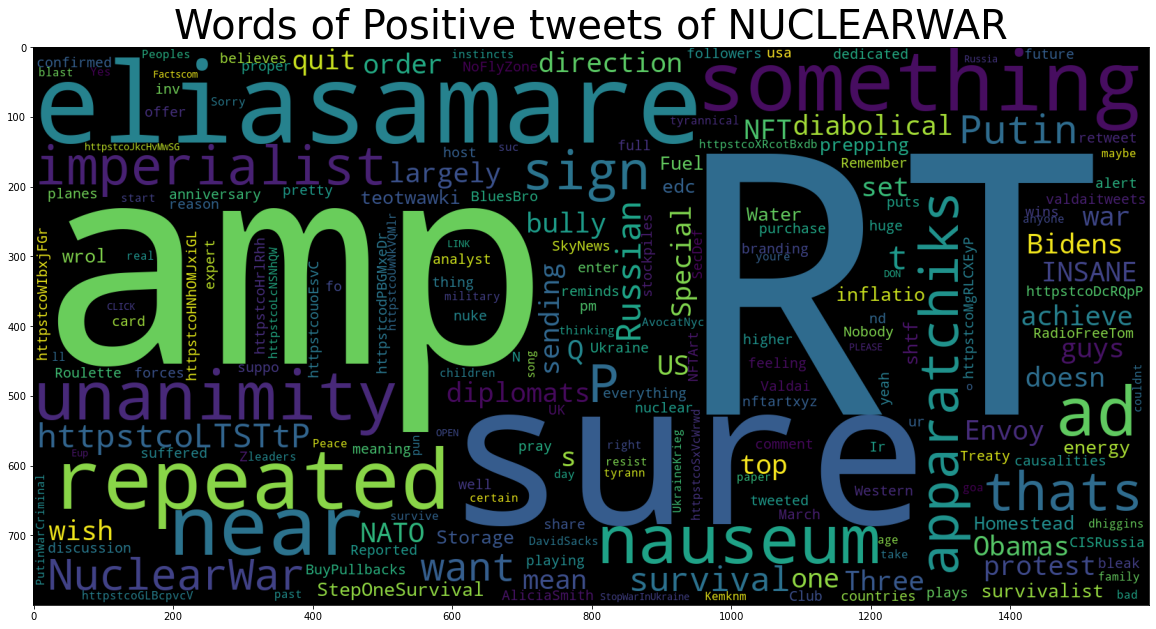

In [171]:
# Plot a cloud of words for positive tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_pos_nuc))
plt.title('Words of Positive tweets of NUCLEARWAR',fontsize = 40)

plt.imshow(wc)
plt.savefig('pos_nuclearwar.png')

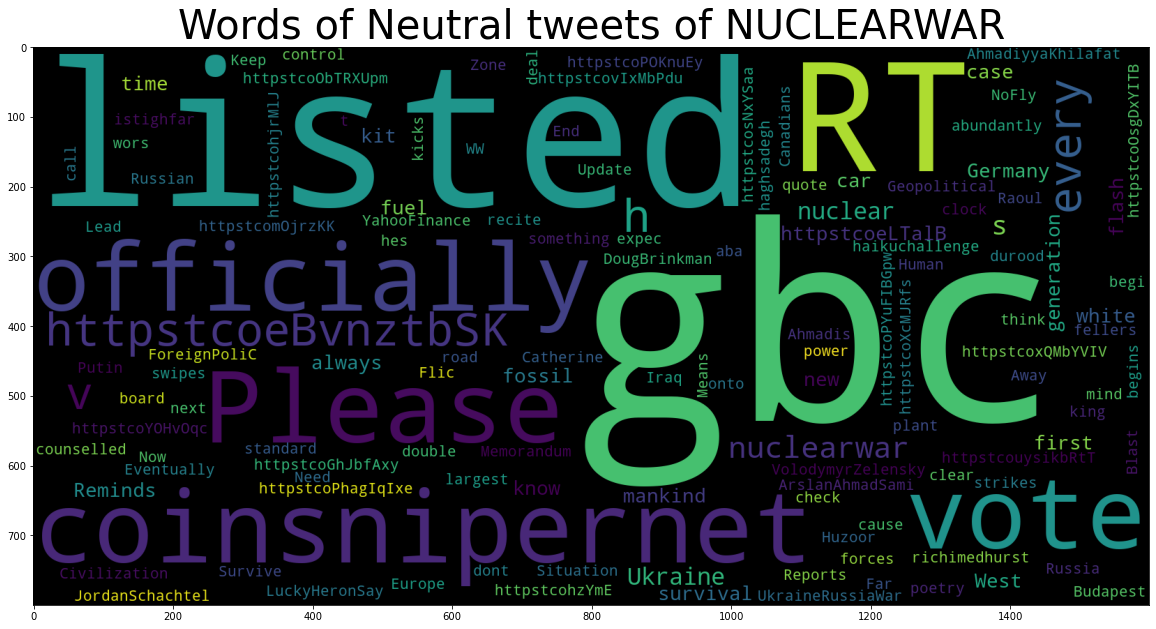

In [172]:
# Plot a cloud of words for neutral tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neu_nuc))
plt.title('Words of Neutral tweets of NUCLEARWAR',fontsize = 40)


plt.imshow(wc) 

plt.savefig('neu_nuclearwar.png')

### Plots of Nike 

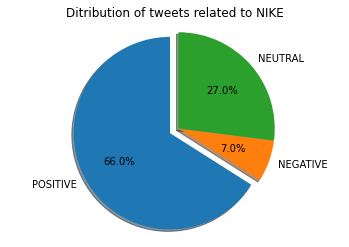

In [173]:
# Pie chart of positive negative and neutral tweets of Nike:
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [n_pos_nike, n_neg_nike, n_neu_nike]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Positive')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ditribution of tweets related to NIKE')

plt.savefig('piechart_nike.png')
plt.show()


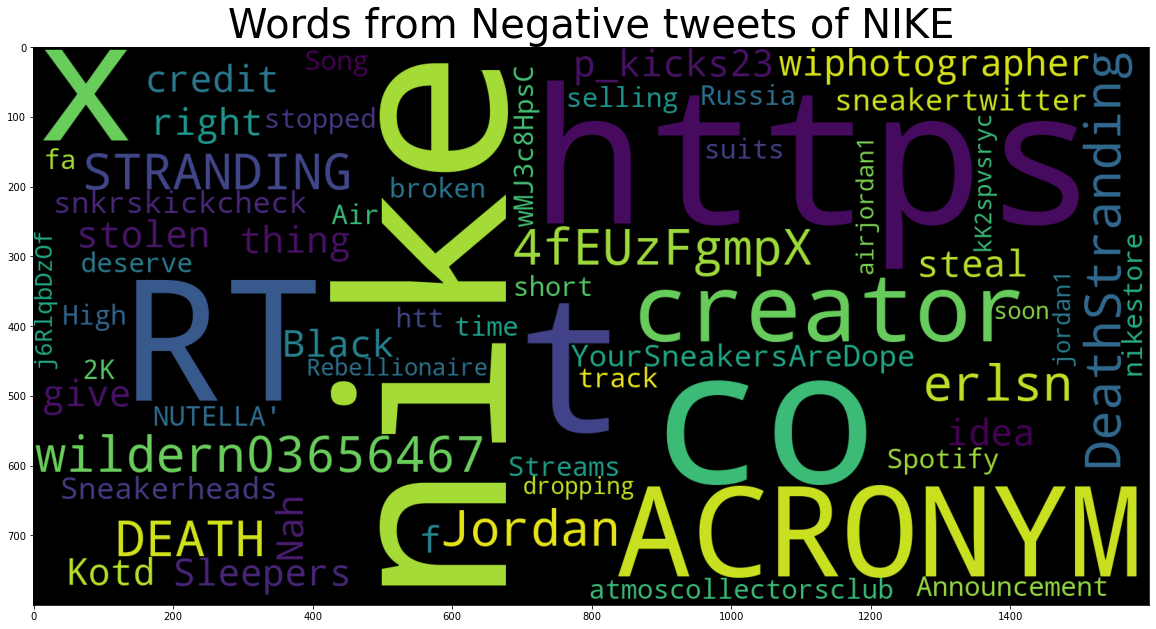

In [174]:
# Plot a cloud of words for negative tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neg_nike))
plt.title('Words from Negative tweets of NIKE',fontsize = 40)

plt.imshow(wc)
plt.savefig('neg_nike.png')

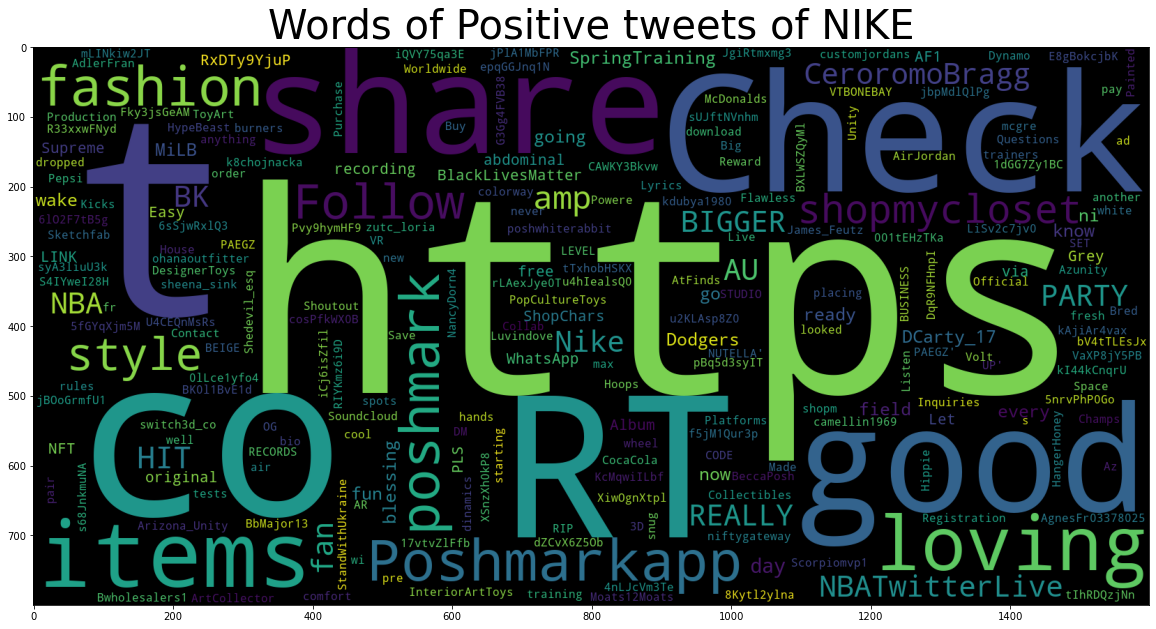

In [186]:
# Plot a cloud of words for positive tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_pos_nike))
plt.title('Words of Positive tweets of NIKE',fontsize = 40)

plt.imshow(wc)
plt.savefig('pos_nike.png')

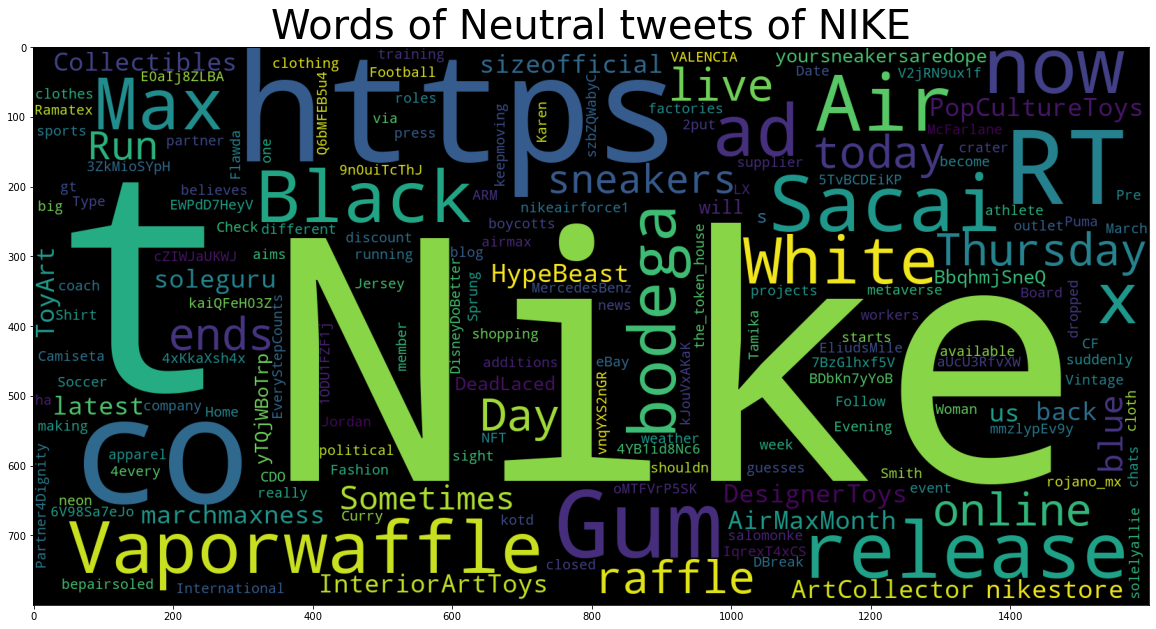

In [185]:
# Plot a cloud of words for neutral tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neu_nike))
plt.title('Words of Neutral tweets of NIKE',fontsize = 40)


plt.imshow(wc)

plt.savefig('neu_nike.png')

### Plots of Gasprices 

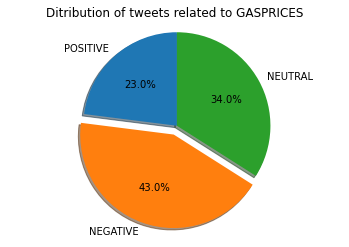

In [191]:
# Pie chart of positive negative and neutral tweets of Nike:
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [n_pos_gas, n_neg_gas, n_neu_gas]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Negtative')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ditribution of tweets related to GASPRICES')

plt.savefig('piechart_gas.png')
plt.show()


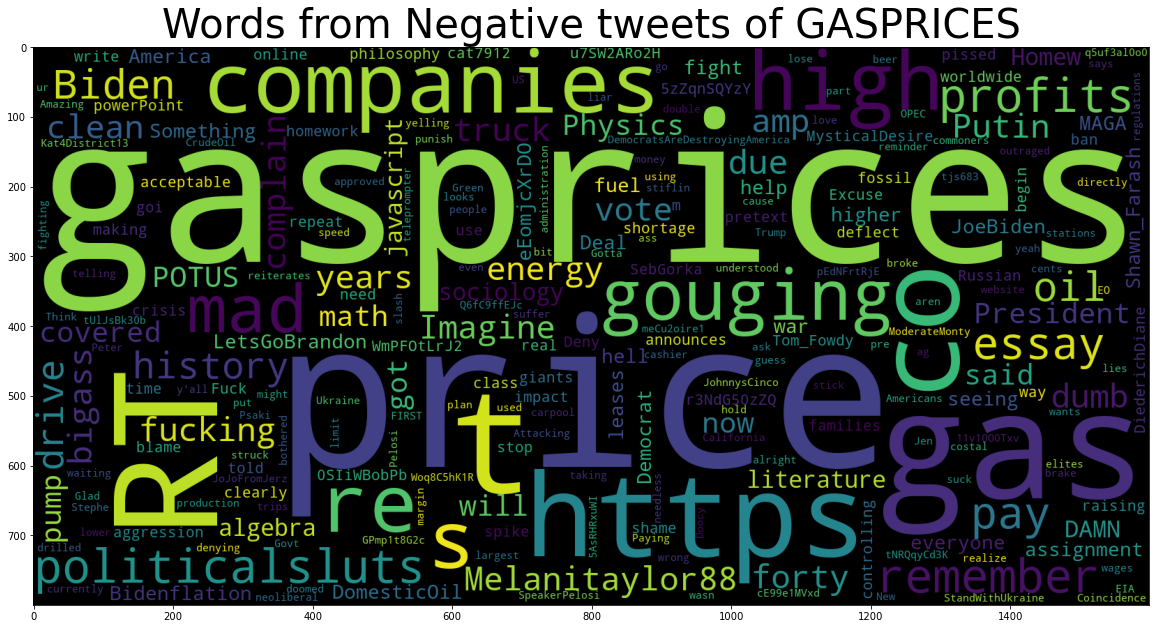

In [194]:
# Plot a cloud of words for negative tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neg_gas))
plt.title('Words from Negative tweets of GASPRICES',fontsize = 40)

plt.imshow(wc)

plt.savefig('neg_gas.png')

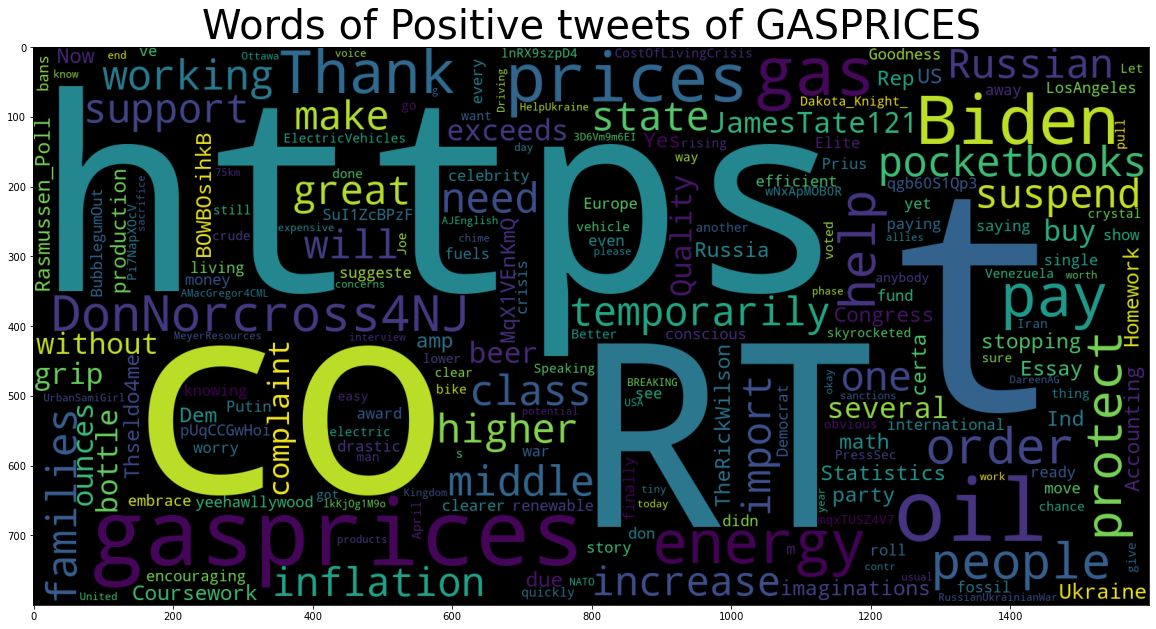

In [195]:
# Plot a cloud of words for positive tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_pos_gas))
plt.title('Words of Positive tweets of GASPRICES',fontsize = 40)

plt.imshow(wc)
plt.savefig('pos_gas.png')

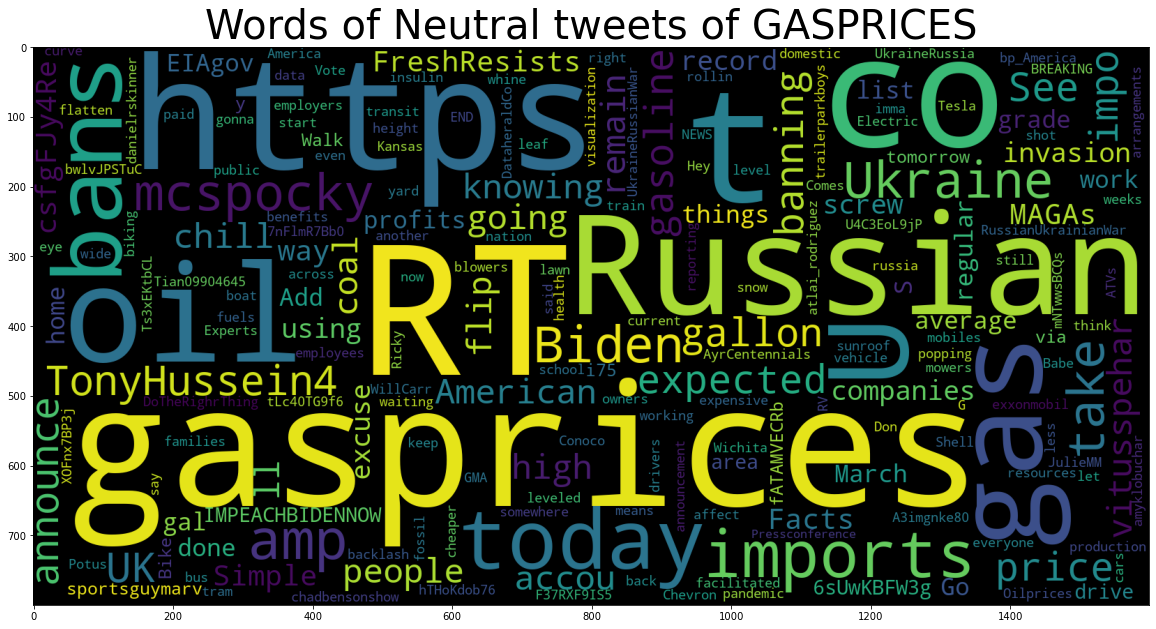

In [196]:
# Plot a cloud of words for neutral tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neu_gas))
plt.title('Words of Neutral tweets of GASPRICES',fontsize = 40)


plt.imshow(wc)
plt.savefig('neu_gas.png')